# Librerías y configuraciones

In [1]:
# Arrays para manipular datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)

# Ciencia de datos, machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, recall_score
from sklearn.metrics import precision_score, f1_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Carga de datos

In [2]:
# https://drive.google.com/file/d/1sWLmuazrRKlb1_c88soFRqQYF0wXCxgT/view?usp=sharing
data = pd.read_csv("./segmentation data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# Eliminamos el ID
data = data.drop('ID', axis = 1)

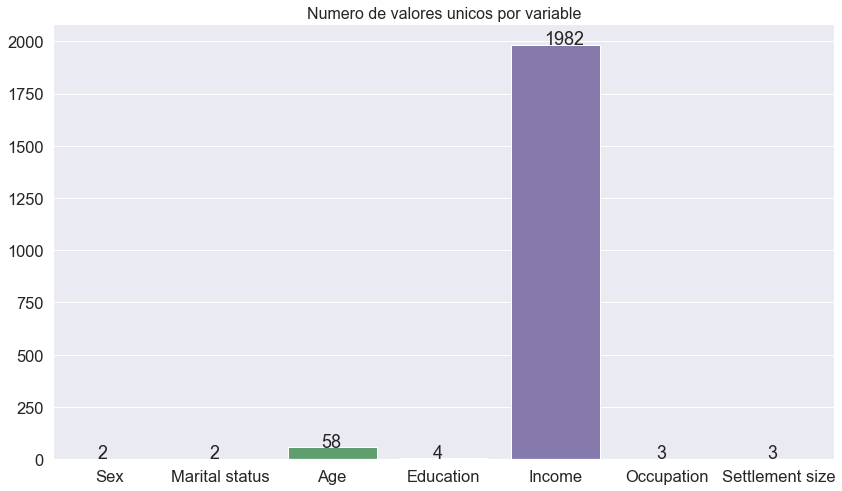

In [4]:
plt.figure(figsize=(14,8))
x = list(data.nunique().index)
y = data.nunique().values
for i in range(len(x)):
        plt.text(i-.1,y[i]+2,str(y[i]))
plt.title("Numero de valores unicos por variable",fontdict={"fontsize":16})
sns.barplot(x = x,y = y)
plt.show();

In [5]:
data.info()
data.sample(15)
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

<AxesSubplot:>

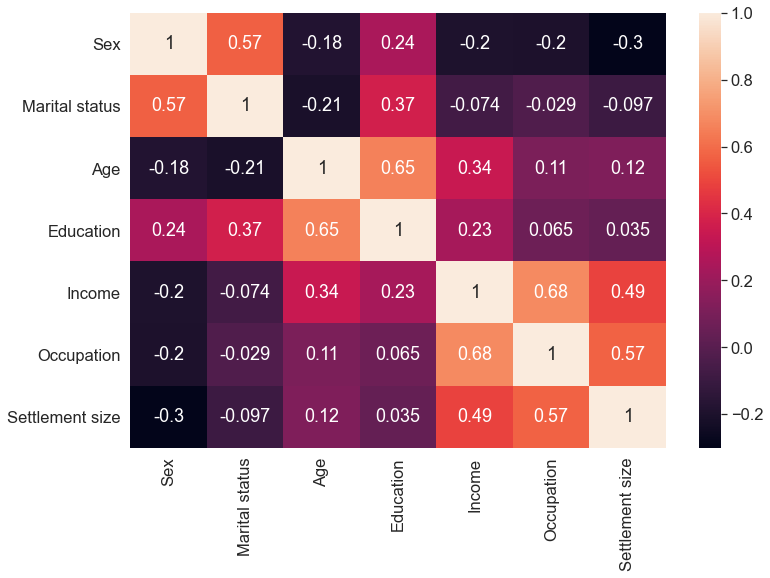

In [6]:
sns.heatmap(data.corr(), annot=True)

# Escalado



In [7]:
scaler = StandardScaler()
scaler.fit(data)
data_escalada = scaler.transform(data)
#data_escalada
data_escalada_df = pd.DataFrame(data_escalada, index=data.index, columns=data.columns)
data_escalada_df.sample(15)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
814,-0.917399,-0.993024,0.861266,-0.063372,0.353775,0.296823,1.552326
1693,1.090038,1.007025,-1.187132,-0.063372,-1.385575,-1.269525,-0.909730
181,-0.917399,1.007025,-0.504333,-0.063372,1.254842,1.863171,0.321298
1756,1.090038,-0.993024,0.007767,-0.063372,-0.036600,0.296823,-0.909730
1411,1.090038,-0.993024,0.519866,1.604323,-0.203794,-1.269525,-0.909730
614,1.090038,1.007025,-1.187132,-0.063372,-0.497501,0.296823,-0.909730
363,-0.917399,1.007025,-1.272482,-0.063372,-0.634800,0.296823,1.552326
909,1.090038,1.007025,-0.248283,-0.063372,-0.468865,-1.269525,-0.909730
960,-0.917399,1.007025,-0.504333,-0.063372,-0.452907,0.296823,0.321298
285,1.090038,1.007025,-0.077583,-0.063372,1.233371,-1.269525,0.321298


# PCA exploratorio



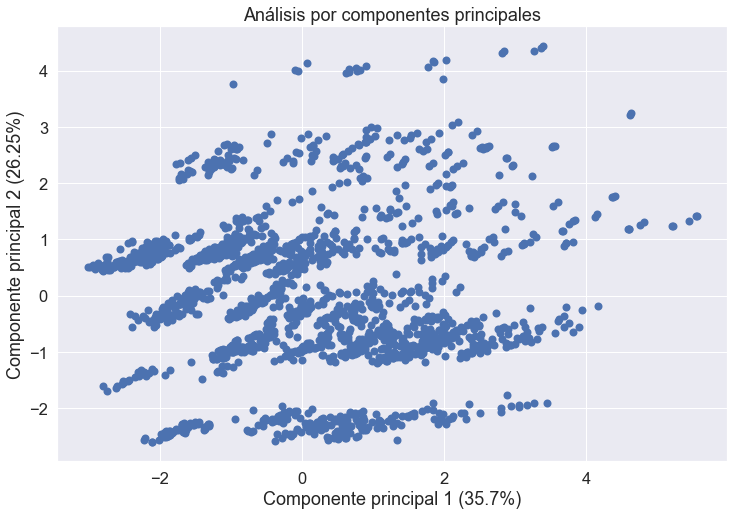

In [8]:
# instancio la clase
pca = PCA()
# calculo PCA
pca.fit(data_escalada)
# transformo los datos originales al plano PCA
pca_data = pca.transform(data_escalada)

# cálculo varianza explicada
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)

# gráfico
#plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2, c=data['Income'])
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Análisis por componentes principales")
plt.show()

In [9]:
var_pc = pca.explained_variance_ratio_

indice = 1
for var in var_pc:
    print("PCA{:02} : {:05.4f}".format(indice, round(var,4)))
    indice += 1
    
#print(pca.components_[0])
#print(pca.components_[1])

cargas = pd.DataFrame(pca.components_.T,
                        columns=['PC%s' % _ for _ in range(len(data_escalada_df.columns))],
                        index=data_escalada_df.columns)
cargas

PCA01 : 0.3570
PCA02 : 0.2625
PCA03 : 0.1882
PCA04 : 0.0756
PCA05 : 0.0572
PCA06 : 0.0395
PCA07 : 0.0200


,PC0,PC1,PC2,PC3,PC4,PC5,PC6
Sex,-0.314695,0.458006,-0.293013,-0.315601,-0.707185,-0.051119,-0.054893
Marital status,-0.191704,0.512635,-0.441977,0.280454,0.497560,0.125517,-0.403901
Age,0.326100,0.312208,0.609544,-0.009506,-0.135160,-0.099586,-0.629576
Education,0.156841,0.639807,0.275605,0.181476,0.106597,-0.114333,0.657816
Income,0.524525,0.124683,-0.165662,-0.482600,0.078890,0.662812,0.058633
Occupation,0.492059,0.014658,-0.395505,-0.281690,0.133942,-0.709121,-0.033115
Settlement size,0.464789,-0.069632,-0.295685,0.690265,-0.445565,0.128339,-0.015129


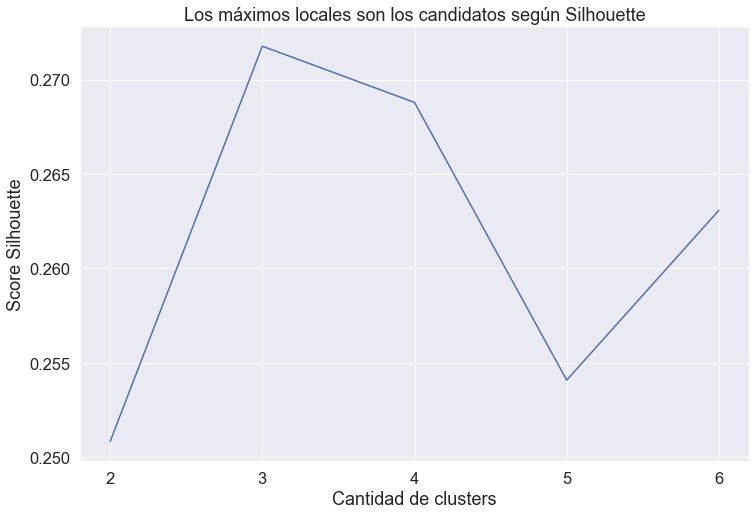

In [10]:
# Silhouette score: va entre -1 y 1 (1 es lo mejor).
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

silhouette_scores = []
rango_clusters = range(2,7)

for i in rango_clusters:
    # para cada valor de i, calculo kmeans y silhouette
    k_means = KMeans(n_clusters=i,random_state=42, n_init=30)
    k_means.fit(data_escalada_df)
    
    sil_score = silhouette_score(data_escalada_df, labels=k_means.labels_)
    silhouette_scores.append(sil_score)

plt.plot(rango_clusters,silhouette_scores)
plt.xticks(rango_clusters)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score Silhouette')
plt.title('Los máximos locales son los candidatos según Silhouette')
plt.show()

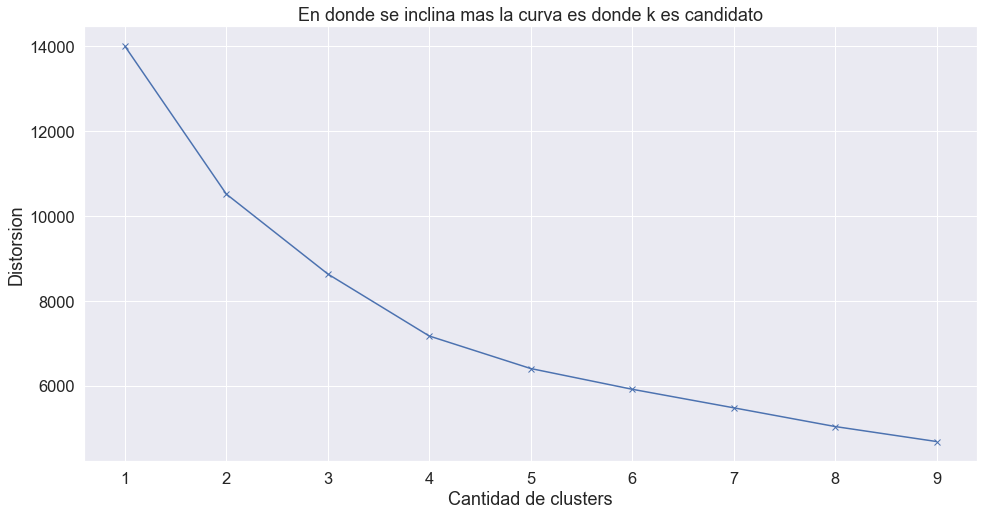

In [29]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_escalada_df)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Cantidad de clusters')
plt.ylabel('Distorsion')
plt.title('En donde se inclina mas la curva es donde k es candidato')
plt.show()

Por el metodo de Silohuette obtenemos un k optimo de 3 y por el metodo del codo el k optomo seria 4.  
Decidimos entonces por el mayor de ellos que es 4

In [ ]:
# Elijo la cantidad de clusters
cant_clusters = 4

# Clustering (agrupamiento) por K-means

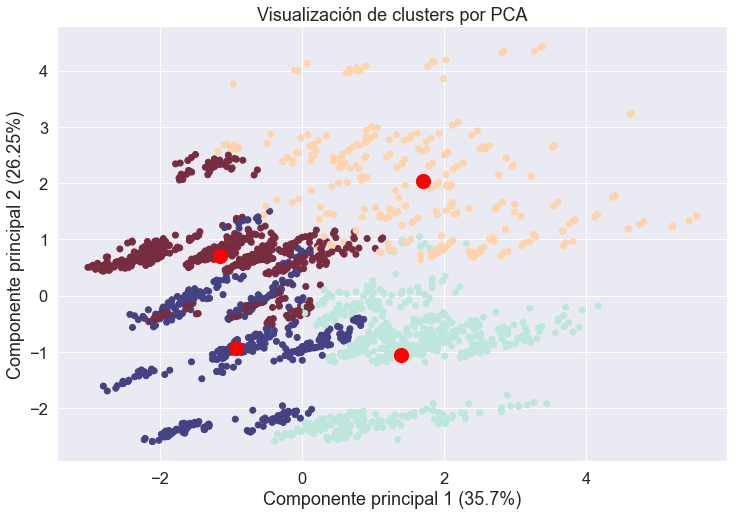

In [36]:
# instancio la clase
kmeans = KMeans(n_clusters=cant_clusters)#, random_state=42)
# entreno al modelo
kmeans.fit(data_escalada)
# que me prediga el cluster para cada dato
y_kmeans = pd.Series(kmeans.predict(data_escalada))

# que me diga los centroides
centroides = kmeans.cluster_centers_
# transformo los centroides al plano PCA para poderlos graficar
centroides_pca = pca.transform(centroides)

# grafico en el plano PCA datos, clusters y centroides
plt.scatter(pca_data[:,0],pca_data[:,1], c=kmeans.labels_, cmap="icefire")
plt.scatter(centroides_pca[:,0],centroides_pca[:, 1], c="red", s=200)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA")
plt.show()

# Exploración de las características de los clusters

In [53]:
# Agrega una nueva variable con el cluster al que pertenece cada observación
data["Cluster"] = y_kmeans
data_escalada_df["Cluster"] = y_kmeans
# Calculo la media de cada variable para cada cluster
data.groupby(["Cluster"]).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [50]:
data.groupby(["Cluster"]).std()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.170252,0.379170,8.501018,0.442605,33459.299686,0.486823,0.537199
1,0.478363,0.138356,8.749180,0.517314,22950.837099,0.470361,0.203730
2,0.353456,0.053225,6.751582,0.252071,25370.288131,0.518935,0.652831
3,0.500950,0.462540,10.502066,0.358136,46204.670732,0.652665,0.771145


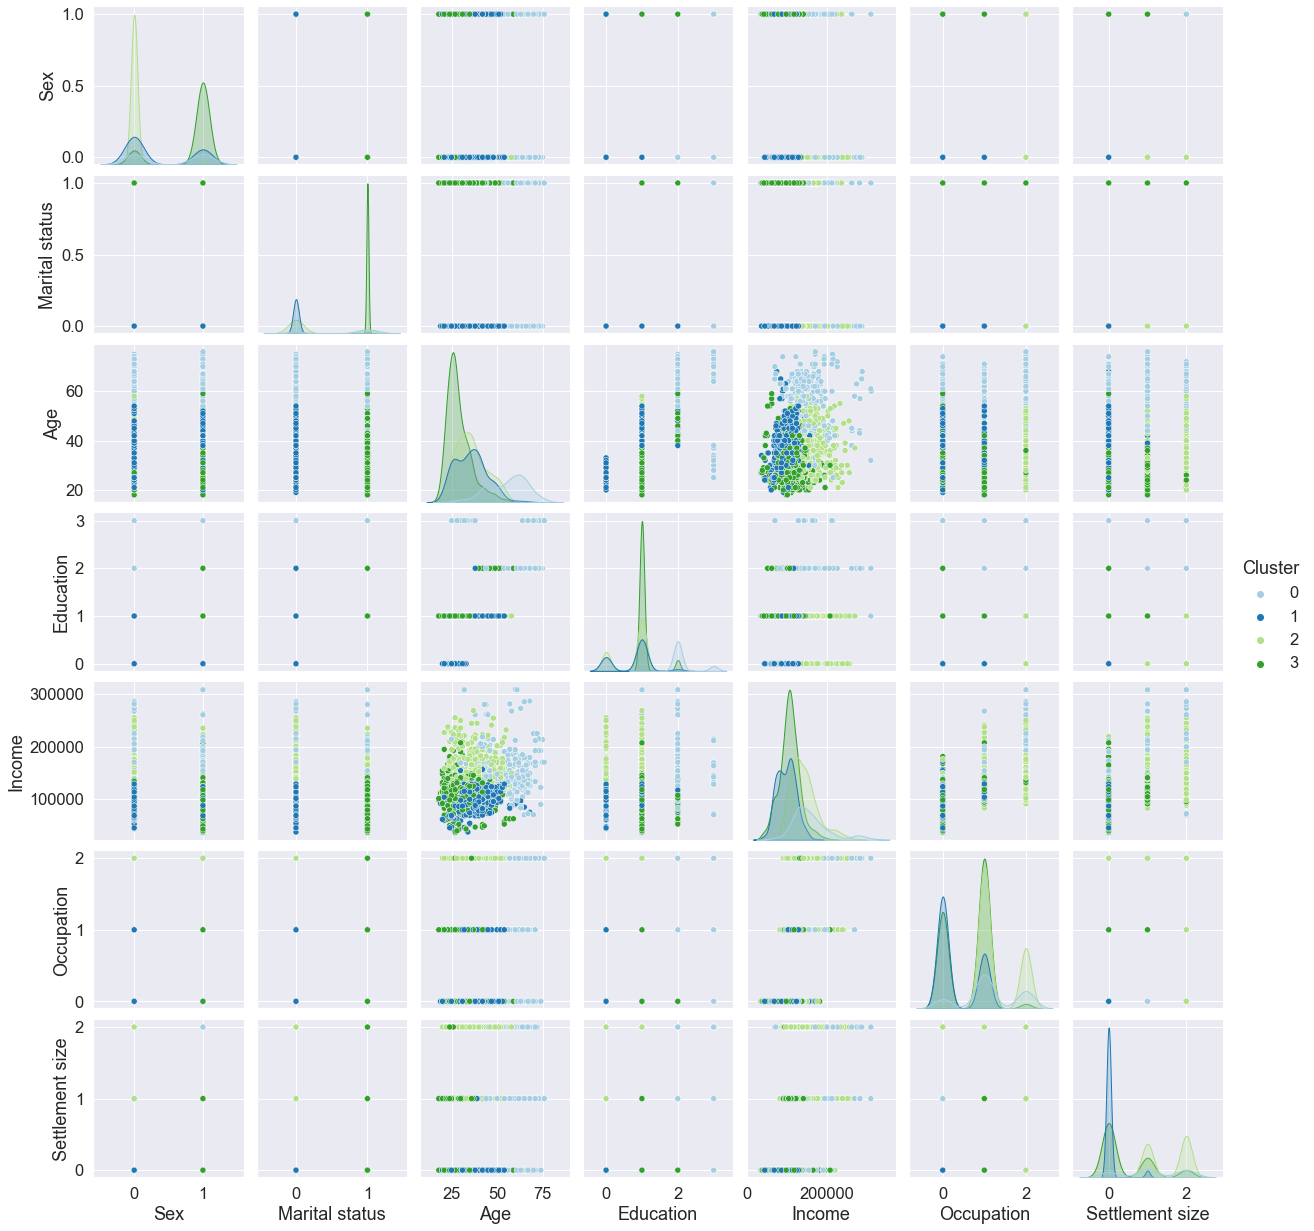

In [34]:
# densidades para cada variable, y scatter plots dos a dos, identificando cada cluster.
#sns.pairplot(data, hue="Cluster", palette=['green','orange','brown', 'cyan', 'yellow'])
sns.pairplot(data, hue="Cluster", palette="icefire")

plt.show()

# Si hago K-means sobre los datos **sin** escalar, ¿las características de los clusters cambian?

In [30]:
# instancio la clase
kmeans = KMeans(n_clusters=cant_clusters)#, random_state=42)
# entreno al modelo en datos SIN escalar
kmeans.fit(data) 
# que me prediga el cluster para cada dato SIN escalar
y_kmeans = pd.Series(kmeans.predict(data))


# Agrega una nueva variable con el cluster al que pertenece cada observación
data["Cluster"] = y_kmeans
# Calculo la media de cada variable para cada cluster
data.groupby(["Cluster"]).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.396797,0.455516,38.645907,1.120996,131865.895018,0.975089,0.950178
1,0.546592,0.554937,32.293463,0.941586,105833.310153,0.748261,0.623088
2,0.292857,0.460714,41.967857,1.242857,168190.928571,1.400000,1.310714
3,0.540984,0.494536,32.459016,0.885246,74376.442623,0.027322,0.049180
4,0.246575,0.383562,44.506849,1.328767,238230.369863,1.821918,1.520548


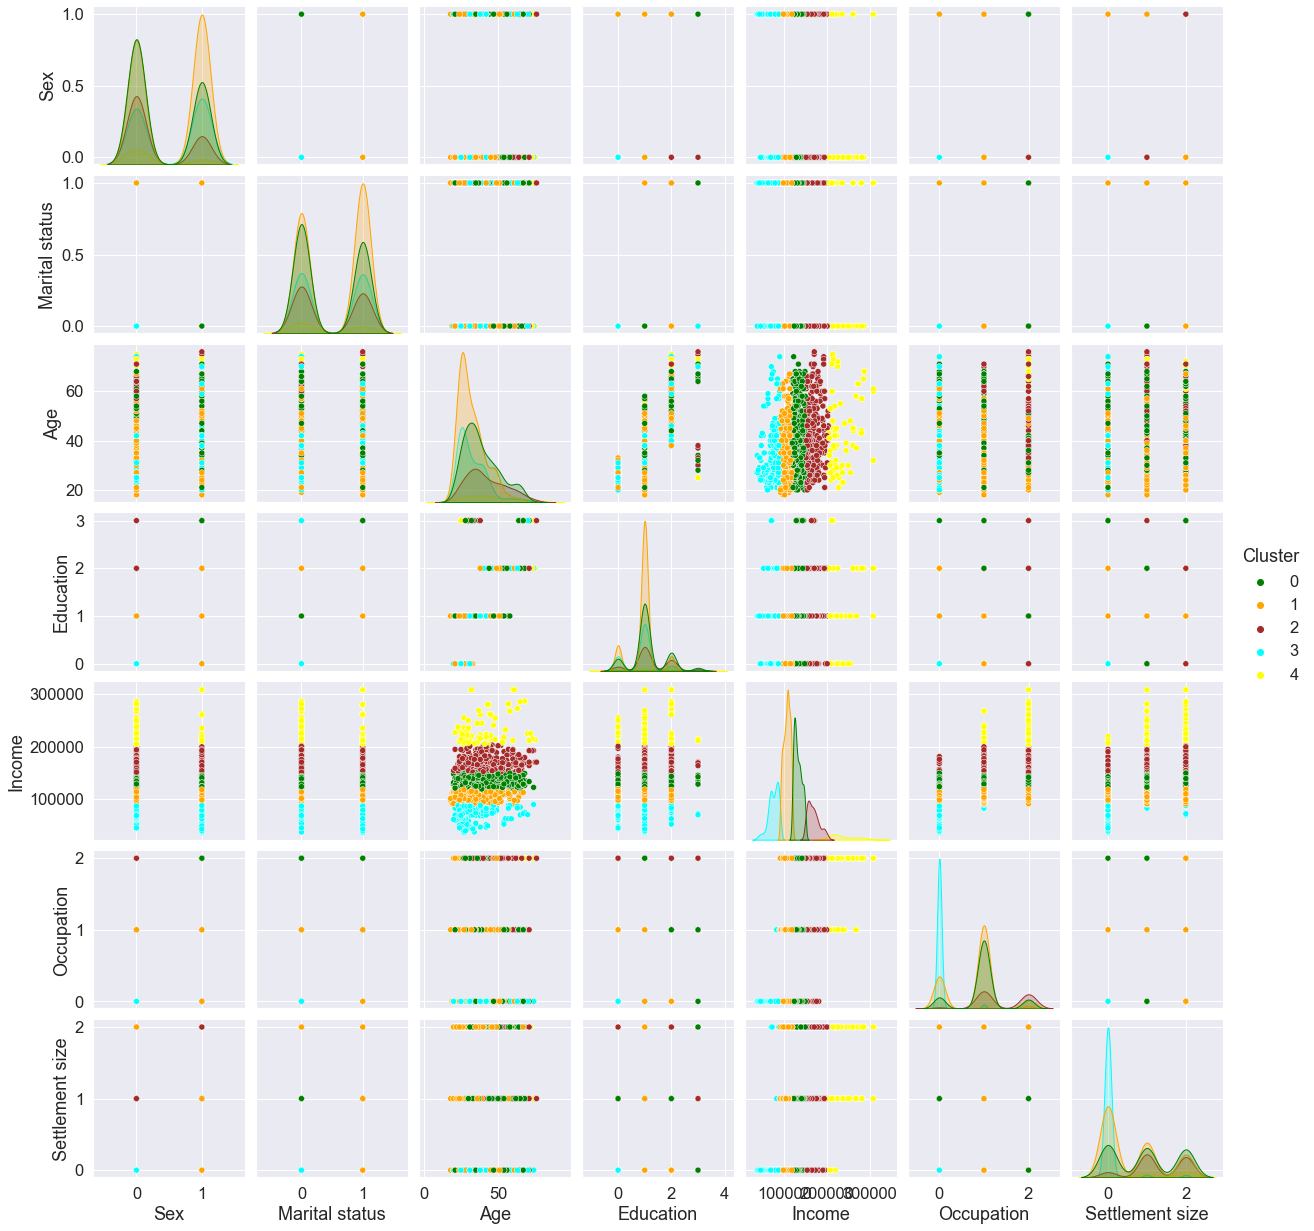

In [32]:
# densidades para cada variable, y scatter plots dos a dos, identificando cada cluster.
sns.pairplot(data, hue="Cluster", palette="icefire")
plt.show()

# CORRER y comparar contra el anterior.

# ¿Y se puede visualizar por PCA con los datos sin escalar?

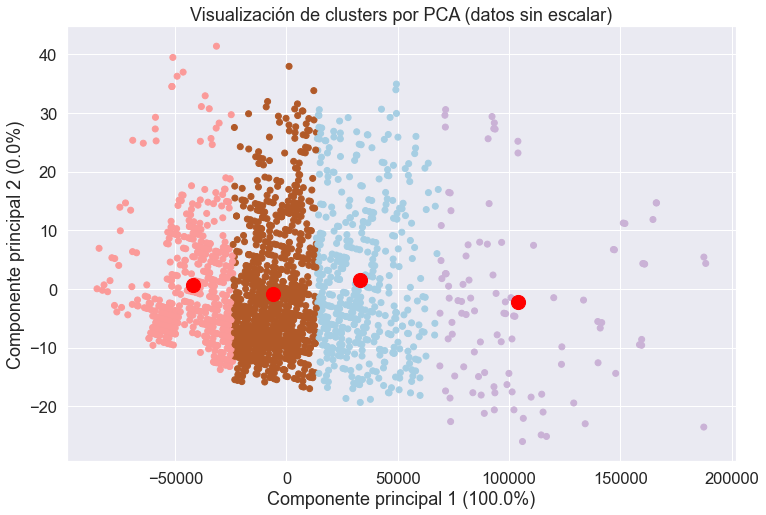

In [26]:
# instancio la clase
pca = PCA(n_components=2)
# calculo PCA sobre datos SIN escalar
pca.fit(data)
# transformo los datos originales al plano PCA
pca_data = pca.transform(data)

# calculo varianza explicada
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)

# que me diga los centroides
centroides = kmeans.cluster_centers_
# transformo los centroides al plano PCA para poderlos graficar
centroides_pca = pca.transform(centroides)

# grafico en el plano PCA datos, clusters y centroides
plt.scatter(pca_data[:,0],pca_data[:,1], c=kmeans.labels_, cmap="Paired")
plt.scatter(centroides_pca[:,0],centroides_pca[:, 1], c="red", s=200)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA (datos sin escalar)")
plt.show()


# ¿Y cómo averiguar las posibles cantidades de clusters?

## Una forma es por el Silhouette score

In [ ]:
# Silhouette score: va entre -1 y 1 (1 es lo mejor).
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

silhouette_scores = []
rango_clusters = range(2,7)

for i in rango_clusters:
    # para cada valor de i, calculo kmeans y silhouette
    k_means = KMeans(n_clusters=i,random_state=42, n_init=30)
    k_means.fit(data_escalada)
    
    sil_score = silhouette_score(data_escalada, labels=k_means.labels_)
    silhouette_scores.append(sil_score)

plt.plot(rango_clusters,silhouette_scores)
plt.xticks(rango_clusters)
plt.xlabel('Cantidad de clusters')
plt.ylabel('Score Silhouette')
plt.title('Los máximos locales son los candidatos según Silhouette')
plt.show()

## Ahora que lo tenemos clasificado lo analizamos por bayes ingenuo


In [56]:
# Separamos en features y target y normalizamos las features
# separamos
target = data_escalada_df['Cluster']
features = data_escalada_df.drop(columns = 'Cluster')
# Separamos en test y entrenamiento
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)


In [71]:
# Modelo Bayes ingenuo
gnb = GaussianNB() 
gnb = gnb.fit(x_train,y_train)

In [83]:
# Matriz de confusion sobre test
y_pred=gnb.predict(x_test)

cf_matriz = confusion_matrix(y_test,y_pred)

print("F1 score :\n",f1_score(y_test,y_pred, average='micro'))
cf_matriz

F1 score :
 0.94


array([[103,   0,   8,   4],
       [  4,  89,   0,   2],
       [  0,   1, 137,   4],
       [  0,   1,   0,  47]])

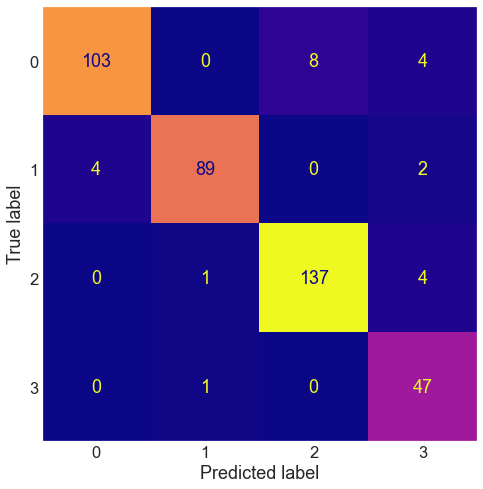

In [82]:
# plt.rcParams["figure.figsize"] = (15,15)
# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matriz, display_labels=gnb.classes_)
disp.plot(values_format='d', colorbar=False, cmap='plasma') 
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)